<div style="background-color: #0070C0; height: 60px; color:white;padding: 0 0 0 0%; font-size:2rem; margin-right: 40%"> Data wrangling y generación de insights. </div>

En este notebook repasaremos la exploración de datos (módulo 3) pero con un enfoque distinto. 

Aquí vamos a preparar un dataset que nos servirá para contestar preguntas específicas que nos ayudarán a proponer *insights* o hallazgos de interés.

Al final nos centraremos únicamente en uno de esos hallazgos e intentaremos dos cosas:

- Reproducir un gráfico propuesto.
- Crear un gráfico desde cero.

Para ello indetificarás las siguientes secciones:

1. Limpieza y preparación del dataset.
2. Exploración de datos.
3. Graficando un hallazgo interesante.
4. Pregunta de bonus.

<div style="background-color: #0070C0; height: 30px; color:white;padding: 0 0 0 0%; font-size:2rem; margin-right: 40%"></div>

# 1. Limpieza y preparación del dataset.

En esta sección vamos a limpiar y homologar nuestro dataset, así todos los equipos podrán partir del mismo conjunto de datos.

**No es necesario que modifiques el código de esta parte**, sólo lee las celdas y trata de entender que se hace en cada una de ellas.

En la siguiente sección ya no habrá código y tendrás que contestar las preguntas que se piden con lo que has aprendido de los diferentes módulos hasta ahora. 

__Consejo:__ Primordialmente dale preferencia al *data wrangling*, ya que ese arreglo de datos te permitirá _interrogar_ a tus datos de diferentes maneras.

Vamos a importar los tres datasets ya que tal vez necesitemos valores de alguno de ellos:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

df          = pd.read_csv("../../../../datasets/flights.csv")  #Indica aqui el path y nombre de tu dataset flights.csv
df_airports = pd.read_csv("../../../../datasets/airports.csv") #Indica aqui el path y nombre de tu dataset airports.csv
df_airlines = pd.read_csv("../../../../datasets/airlines.csv") #Indica aqui el path y nombre de tu dataset airlines.csv

Nos interesa evaluar únicamente aquellos aeropuertos de la IATA, por lo que nos quedaremos sólo con aquellos aeropuertos que se encuentran en nuestro dataset `airports`.

La manera de hacer esta relación es a través de filtrar nuestro dataset. 

Vamos a hacer un subset basándonos en el código que se encuentra en `df_airports`.

In [ ]:
df_airports

Para ello vamos a crear una lista `airport_code` a partir de la columna `IATA_CODE` de `df_airports` 

In [ ]:
airport_code = df_airports["IATA_CODE"].tolist()

Y vamos a filtrar nuestro dataset `df` utilizando esa lista. Observa que tomaremos en cuenta tanto `ORIGIN_AIRPORT` cómo `DESTINATION_AIRPORT`:

In [ ]:
df[(df["ORIGIN_AIRPORT"].isin(airport_code)) & (df["DESTINATION_AIRPORT"].isin(airport_code))]

Vamos a sobrescribir nuestra variable `df` con este nuevo dataset:

In [ ]:
df = df[(df["ORIGIN_AIRPORT"].isin(airport_code)) & (df["DESTINATION_AIRPORT"].isin(airport_code))]

Como nos interesan sólo los retrasos y no las cancelaciones, vamos a remover todas las filas que tienen cancelación:

In [ ]:
df[df["CANCELLED"]!=1]

Vamos a sobrescribir nuestro dataset `df` con ese nuevo subset:

In [ ]:
df = df[df["CANCELLED"]!=1]

Vamos a quitar las columnas relacionadas con la cancelación

In [ ]:
df = df.drop(columns=["CANCELLED","CANCELLATION_REASON"])

df

Vamos a resetar nuestros índices:

In [ ]:
df.reset_index(inplace=True, drop=True)
df

¿Recuerdas el __módulo 2__? ahí viste el poder de combinar bases de datos. Pues bien, ese tipo de manipulaciones también son parte de data wrangling y aqui vamos a utilizar una de esas operaciones. Vamos a crear un __inner join__ para traer los __estados__ de los aeropuertos.

Con pandas vamos a hacer lo siguiente:

In [ ]:
df_main = (df.merge(df_airports[["IATA_CODE","STATE"]],    #Inner join con un subset de df_airports
                   left_on="ORIGIN_AIRPORT",               #Unir aeropuerto de origen con
                   right_on="IATA_CODE",                   #el código IATA
                   how="inner")
            .rename(columns={"STATE": "Estado (origen)"})  #Cambiamos el nombre de la variable a Estado (origen)
            .drop(columns=["IATA_CODE"])                   #Quitamos el código IATA
            )

df_main

Y vamos a repetir lo mismo para el aeropuerto de destino, sólo que ahora ahoremos el join con `df_main` y sobreescribimos `df`

In [ ]:
df = (df_main.merge(df_airports[["IATA_CODE","STATE"]],    #Inner join con un subset de df_airports
                   left_on="DESTINATION_AIRPORT",          #Unir aeropuerto destino con
                   right_on="IATA_CODE",                   #el código IATA
                   how="inner")
            .rename(columns={"STATE": "Estado (llegada)"})  #Cambiamos el nombre de la variable a Estado (origen)
            .drop(columns=["IATA_CODE"])                   #Quitamos el código IATA
            )

df

Por último vamos a crear una nueva columna llamada `Atraso`.

Esta columna nos indicará si hubo un atraso o no.

La manera en que definimos un atraso lo encontramos en nuestro material del primer módulo y se define cómo *Un vuelo que se encuentra 15 minutos o más tarde de su horario estipulado"*

In [ ]:
df["Atraso"] = np.where((df["DEPARTURE_DELAY"]<15) | (df["ARRIVAL_DELAY"]<15),"A tiempo", "Retraso")
df

Excelente, tenemos un dataset con el cuál podemos contestar las preguntas que se nos piden de esta exploración guiada.

En la **sección 2** se realizarán una serie de preguntas que tendrás que contestar aplicando algunas de las operaciones de data wrangling y/o graficando tus datos (similar a lo que hiciste en el módulo 3 pero con otro enfoque).

En la **sección 3** se tomará uno de los insights generados en la sección 2 y se intentará replicar el gráfico alusivo a ese insight.

<div style="background-color: #0070C0; height: 30px; color:white;padding: 0 0 0 0%; font-size:2rem; margin-right: 40%"></div>

# 2. Exploración de datos.

Esta sección es una __exploración guiada__. Tómalo cómo punto de partida e inspiración para cualquier proyecto de ciencia de datos y, principalmente, en la etapa de exploración que es dónde intentarás entender tus datos.

Las preguntas que vienen a continuación son las mismas preguntas que vienen en tu archivo de word, recuerda contestarlas en ese archivo pero tomando en cuenta que en el word no subirás código, sólo contestarás la pregunta. 

Una vez que tengas todo listo, deberás subir el archivo word, con sus respuestas, en formato PDF y agregar también este notebook (en su formato original .ipynb) para evaluar la lógica que seguiste.

El notebook es todo tuyo, que comience el análisis:

## 2.1 Proporciones del dataset.

¿Cuántos vuelos con `Retraso` están registrados en nuestro dataset y cuántos vuelos sin retraso (`A tiempo`) están registrados en nuestro dataset? (variable creada previamente bajo el nombre de `Atraso`)

In [ ]:
#Inserte código aquí
num_delay = df[df['Atraso']=='Retraso']['Atraso'].count()
num_ot = df[df['Atraso']=='A tiempo']['Atraso'].count()
print(f"Con retraso tenemos {num_delay:,} ({num_delay/df['Atraso'].count()*100:.2f})%")
print(f"A tiempo tenemos {num_ot:,} ({num_ot/df['Atraso'].count()*100:.2f})%")

In [ ]:

px.pie(df, 'Atraso')


¿Cuál es la __proporción__ de vuelos con __retraso__ respecto a __vuelos que estuvieron a tiempo__?

__pista:__  proporción:= $\frac{X_{retraso}}{X_{a tiempo}}$

In [ ]:
#Inserte código aquí

<div style="background-color: #4bb392; height: 25px; color:white;padding: 0 0 0 1%; font-size:1rem; margin-right: 40%">Alerta de insight</div>

Esta sencilla operación ya está generando un insight importante, y tiene que ver con la manera en la que __vas a crear tus conjuntos de datos de entrenamiento y de prueba__ (módulo 4).

Vamos a contestar unas preguntas para confirmar este hallazgo.

<div style="border-top: 1px solid #c9c9c9;"></div>

<div style="color:#c9c9c9">Contesta en este markdown (haz doble click o presiona enter para editar)</div>

¿Crees qué esa __proporción__ $\frac{X_{retraso}}{X_{a tiempo}}$ influye en cómo vas a muestrear tu conjunto de datos para poder separarlo en datos de entrenamiento y datos de prueba? Explica tu respuesta.
    
    - Sí, por que al separar los sets de entrenamiento y prueba, queremos que contengan una buena distribución de ambos estados; de otra manera, nos arriesgaríamos a que hubiera solo un tipo de estado (ya que es mucho más predominante "A tiempo") en nuestros sets.

<div style="color:#c9c9c9">Contesta en este markdown (haz doble click o presiona enter para editar)</div>

¿Qué tipo de muestreo utilizarías para generar tu dataset de prueba y tu dataset de entrenamiento?

    - Un muestreo estratificado para homologar la información en nuestros sets de entrenamiento y prueba

<div style="background-color: #0070C0; height: 30px; color:white;padding: 0 0 0 0%; font-size:2rem; margin-right: 40%"></div>

## 2.2. Horario de retraso.

¿Cómo es la distribución de horarios de salida para todos los vuelos del dataset? (`SCHEDULED_DEPARTURE`).

**Nota**: Si no vas a discretizar las horas y prefieres graficar un histograma, utiliza un número de bins de 200 (La variable está en formato de 24 horas, así que cualquier número cuyas decenas sean mayores a 59 carece de sentido).

In [ ]:
#Inserte código aquí
df["SCHEDULED_DEPARTURE"].describe()

In [ ]:
px.histogram(df, "SCHEDULED_DEPARTURE")


```python
def extractTime(l):
    tt = (l.split(' ')[1]).split('.')[1][-4:]
    return tt[:2] + ':' + tt[-2:]
for t in df['SCHEDULED_DEPARTURE'].sample(5):
    print(extractTime(str(pd.to_datetime(t))))
df['Hora_salida'] = df["SCHEDULED_DEPARTURE"].apply(lambda t: extractTime(str(pd.to_datetime(t))))
```

¿Cómo es la distribución de horarios para los vuelos que salieron `A tiempo`? (`SCHEDULED_DEPARTURE`).

**Nota**: Si no vas a discretizar las horas y prefieres graficar un histograma, utiliza un número de bins de 200 (La variable está en formato de 24 horas, así que cualquier número cuyas decenas sean mayores a 59 carece de sentido).

In [ ]:

#Inserte código aquí
px.histogram(df[df['Atraso']=='A tiempo'], "SCHEDULED_DEPARTURE")


¿Cómo es la distribución de horarios para los vuelos que salieron con `Retraso`? (`SCHEDULED_DEPARTURE`).

**Nota**: Si no vas a discretizar las horas y prefieres graficar un histograma, utiliza un número de bins de 200 (La variable está en formato de 24 horas, así que cualquier número cuyas decenas sean mayores a 59 carece de sentido).

In [ ]:

#Inserte código aquí
px.histogram(df[df['Atraso']=='Retraso'], "SCHEDULED_DEPARTURE")


<div style="background-color: #4bb392; height: 25px; color:white;padding: 0 0 0 1%; font-size:1rem; margin-right: 40%">Alerta de insight</div>

<div style="color:#c9c9c9">Contesta en este markdown (haz doble click o presiona enter para editar)</div>

¿Notas algún intervalo de horas o algún comportamiento que te haga pensar que existe un horario en los que hay más retrasos en los vuelos? (i.e.: de 9 a 12; de 1220 a 1530; etc) ¿Si es así, cuál es ese intervalo?

    - Sí, el intervalo entre las 17:00 y las 21:00 parece tener un incremento para los retrasos

<div style="background-color: #0070C0; height: 30px; color:white;padding: 0 0 0 0%; font-size:2rem; margin-right: 40%"></div>

## 2.3 Días de retraso.

¿Cuántos vuelos totales hay por día de la semana?

In [ ]:
df['DAY_OF_WEEK'].value_counts()

In [ ]:

#Inserte código aquí
# MONTH 	DAY 	DAY_OF_WEEK
px.histogram(df, "DAY_OF_WEEK")


¿Cuántos vuelos que estuvieron a tiempo hay por día de la semana?

In [ ]:
df[df['Atraso']=='A tiempo']['DAY_OF_WEEK'].value_counts()

In [ ]:

#Inserte código aquí
px.histogram(df[df['Atraso']=='A tiempo'], "DAY_OF_WEEK")


¿Cuántos vuelos con retraso hay por día de la semana?

In [ ]:
df[df['Atraso']=='Retraso']['DAY_OF_WEEK'].value_counts()

In [ ]:

#Inserte código aquí
px.histogram(df[df['Atraso']=='Retraso'], "DAY_OF_WEEK")


In [ ]:
"""df.pivot_table(
    values=None,
    index=None,
    columns=None,
    aggfunc='mean',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
    sort=True,
) -> 'DataFrame'
"""
# df.pivot_table(index="Atraso", columns="DAY_OF_WEEK", aggfunc='sum' )

In [ ]:
# df.groupby("DAY_OF_WEEK")["Atraso"].sum()

In [ ]:
# px.bar(df[df['Atraso']=='Retraso']['DAY_OF_WEEK'].value_counts(), )

<div style="background-color: #4bb392; height: 25px; color:white;padding: 0 0 0 1%; font-size:1rem; margin-right: 40%">Alerta de insight</div>

<div style="color:#c9c9c9">Contesta en este markdown (haz doble click o presiona enter para editar)</div>


Comparando las tres gráficas o las tres respuestas de esta sección. ¿Crees que exista algún día dónde los retrasos sean predominantes o escasos?

<div style="background-color: #0070C0; height: 30px; color:white;padding: 0 0 0 0%; font-size:2rem; margin-right: 40%"></div>

## 2.4. Estados con mayor retraso.

¿Cuál es el número de vuelos totales de salida (u origen) por estado? (Utilizar variable `Estado (origen)`) 

In [ ]:
#Inserte código aquí
df['Estado (origen)'].value_counts()

¿Cuál es el número de vuelos de salida (u origen) __con retraso__ por estado? (Utilizar variable `Estado (origen)`) 

In [ ]:
#Inserte código aquí
df[df['Atraso']=="Retraso"]['Estado (origen)'].value_counts()

In [ ]:
px.bar(df[df['Atraso']=="Retraso"]['Estado (origen)'].value_counts().sort_values())

¿Cuál es el porcentaje de vuelos de salida (u origen) __con retraso__ por estado? (Utilizar variable `Estado (origen)`) 

__pista:__ porcentaje de vuelos := *100 •* $\frac{X_{retraso}}{X_{totales}}$ dónde $X$ es el número de vuelos de salida por estado (`Estado (origen)`)

In [ ]:
#Inserte código aquí
(df[df['Atraso']=="Retraso"]['Estado (origen)'].value_counts() / df['Estado (origen)'].value_counts() * 100).sort_values()

In [ ]:
px.bar((df[df['Atraso']=="Retraso"]['Estado (origen)'].value_counts() / df['Estado (origen)'].value_counts() * 100).sort_values())

<div style="color:#c9c9c9">Contesta en este markdown (haz doble click o presiona enter para editar)</div>



Compara tus tres gráficas o tus tres respuestas anteriores. Ordena tus outputs de mayor a menor (si todavía no lo haz hecho) y contesta:

1. ¿Hay alguna diferencia entre el número de vuelos totales por estado, el número de vuelos con retraso por estado y el porcentaje de vuelos con retraso por estado?

    - Sí, Texas tiene muchos vuelos con retrasos pero Delaware en porcentaje es mucho mayor sus vuelos con retrasos


2. ¿Si quisieras comparar los vuelos con retraso por estado, aeropuerto, ciudad o cualquier otra variable, que utilizarías para realizar esa comparación, los valores totales o alguna tasa o razón cómo el porcentaje? ¿Porqué?

    - Ambos, en porcentaje por que en donde hay más vuelos es esperado que haya más retrasos aunque en proporción nos dirá donde hay más patrones donde podamos encontrar causas que ocasionene los retrasos, aunque en totales siguen teniendo mayor impacto donde hay más retrasos totales

¿Cuál es el porcentaje de vuelos de llegada  __con retraso__ por estado? (Utilizar variable `Estado (llegada)`) 

__pista:__ porcentaje de vuelos := *100 •* $\frac{X_{retraso}}{X_{totales}}$ dónde $X$ es el número de vuelos de llegada por estado (`Estado (llegada)`)

In [ ]:
(df[df['Atraso']=="Retraso"]['Estado (llegada)'].value_counts() / df['Estado (llegada)'].value_counts() * 100).sort_values()

In [ ]:
#Inserte código aquí
px.bar((df[df['Atraso']=="Retraso"]['Estado (llegada)'].value_counts() / df['Estado (llegada)'].value_counts() * 100).sort_values())

<div style="background-color: #4bb392; height: 25px; color:white;padding: 0 0 0 1%; font-size:1rem; margin-right: 40%">Alerta de insight</div>

<div style="color:#c9c9c9">Contesta en este markdown (haz doble click o presiona enter para editar)</div>

Al utilizar porcentajes, y ordenar de mayor a menor los vuelos por estado, ¿Observas alguna diferencia entre los estados con más vuelos de salida retrasados y los estados con más vuelos de llegada con atraso?

    - Sí, hay diferentes aeropuertos con mayor retrasos a excepción de DE que sigue siendo el mayor

<div style="background-color: #0070C0; height: 30px; color:white;padding: 0 0 0 0%; font-size:2rem; margin-right: 40%"></div>

# 3. Graficando un hallazgo interesante.

Intenta reproducir el siguiente gráfico. Si quieres hacerlo con python toma cómo referencia el `notebook` del laboratorio de _inisghts_. También puedes intentar replicarlo en otras plataformas o programas.

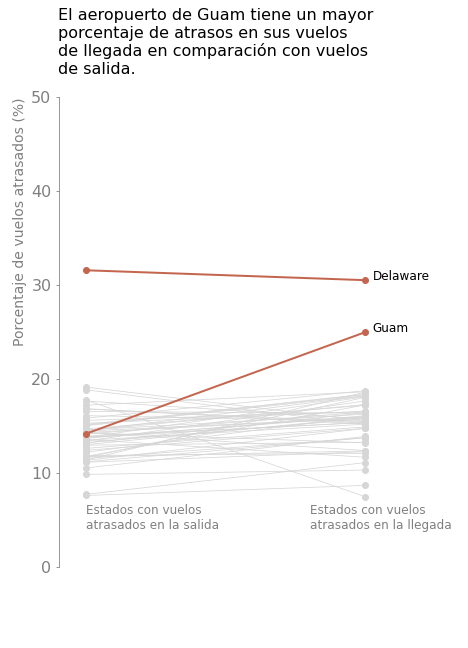

Este es un gráfico de pendientes (slope chart) y sirve para comparar el antes y después de una serie de datos, y si hablamos de contexto entre __salidas__ y __llegadas__, mostrar el antes y después podría ser una buena aproximación para visualizar que los estados con mayor número de retrasos en los vuelos de salida no son completamente los mismos estados con mayor número de retrasos en los vuelos de llegada.

**Sugerencia**
Trata de identificar los canales y las marcas. Analiza como podrías incluir esos canales diferentes. Para algunos aspectos visuales (tamaño de fuentes, remover border de la figura, etc.) toma cómo referencia el código de las gráficas de tu laboratorio de inisghts.



In [ ]:
lateArrivalPercent = df[df['Atraso']=="Retraso"]['Estado (llegada)'].value_counts() / df['Estado (llegada)'].value_counts() * 100
lateOriginPercent = df[df['Atraso']=="Retraso"]['Estado (origen)'].value_counts() / df['Estado (origen)'].value_counts() * 100
arrival2latePercent = lateOriginPercent.to_frame().join(lateArrivalPercent.to_frame())
arrival2latePercent.head()

In [ ]:
#Inserte código aquí
fig,ax = plt.subplots(1,figsize=(6.5,13.33))

states = ['DE', 'GU']

for s in arrival2latePercent.index:
    cur = arrival2latePercent.loc[s]
    if s in states:
        color="#7e181e"  # ginda
        zi = 10
        
    else:
        color="#cccccc"  # gris
        zi = 1  
    
    ax.plot(['Estado (origen)', 'Estado (llegada)'], cur, c=color, zorder=zi)
    ax.scatter(x = 'Estado (origen)',
               y = arrival2latePercent.loc[s]['Estado (origen)'],
               c = color,
               zorder = zi)
    ax.scatter(x = 'Estado (llegada)',
               y = arrival2latePercent.loc[s]['Estado (llegada)'],
               c = color,
               zorder = zi)

ax.text(s='  Delaware',
        x='Estado (llegada)',
        y=arrival2latePercent.loc[states[0]]['Estado (llegada)'],
        c = "#8f8f8f",
        fontsize=12)

ax.text(s='  Guam',
        x='Estado (llegada)',
        y=arrival2latePercent.loc[states[1]]['Estado (llegada)'],
        c = "#8f8f8f",
        fontsize=12)

ax.text(s='Estados con vuelos\natrasados en la salida',
        x='Estado (origen)',
        y=5,
        c='#8f8f8f',
        fontsize=12)

ax.text(s='Estados con vuelos\natrasados en la llegada',
        x='Estado (llegada)',
        y=5,
        c='#8f8f8f',
        fontsize=12)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
    
# X Axis
plt.xticks([])

# Y Axis
ax.set_ylabel("Porcentaje de vuelos atrasados (%)", size=16, loc="top", color="#808080")
ax.tick_params(axis='y', labelsize=12, color="#808080", labelcolor="#808080")

ax.set_ylim(0,50)

ax.set_title('El aeropuerto de Guam tiene un mayor\nporcentaje de atrasos en sus vuelos\nde llegada en comparación con vuelos\nde salida.',
             loc="left",                       #Colorcar título a la izquierda
             size=18)                          #Tamaño de fuente de 18pts

# Pregunta bonus.

La diferencia en el porcentaje de vuelos de ida y de llegada, por estado, nos arrojó un insight interesante. Sin embargo, también sería valioso poder mostrar el número de vuelos totales junto con los porcentajes.

De esa manera podríamos observar que Guam y Delaware son de los aeropuertos con un menor número de vuelos, y que, en porcentajes, California o Texas tienen un número de atrasos promedio pero una gran cantidad de vuelos.

**¿De que formar representarías esos atributos en un gráfico?** (Número de vuelos totales y porcentaje de vuelos de salida y llegada por estado)

Intenta crear ese gráfico, dale rienda suelta a tu creatividad y si puedes remarcar un *insight* interesante será aún mejor.

In [ ]:
#Inserte código aquí (si es que lo haces en python)